In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings 
warnings.filterwarnings('ignore')
sns.set(color_codes=True)

In [3]:
df = pd.read_csv(r"C:\Users\frase\Documents\Fraser\Eduonix\Project files\Auto Insurance\AutoInsurance - AutoInsurance.csv")

# EDA

In [4]:
df.head(10)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,...,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,1/18/11,Unemployed,M,0,...,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,...,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,No,Extended,College,2/17/11,Employed,F,28812,...,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize


In [5]:
print("Shape:",df.shape)
print("Unique customers:",df['Customer'].nunique())
print(df.isnull().sum())

Shape: (9134, 24)
Unique customers: 9134
Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64


In [6]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [8]:
# Evaluating the Customer column

In [9]:
df['Prefixes'] = df["Customer"].str[:2]
print(df['Prefixes'])
print(df['Prefixes'].nunique()) #includes cities, possibly independent variables
df['Customer Num'] = df["Customer"].str[2:]
print(df['Customer Num'])
print(df['Customer Num'].nunique()) #too many unique values

0       BU
1       QZ
2       AI
3       WW
4       HB
        ..
9129    LA
9130    PK
9131    TD
9132    UP
9133    Y1
Name: Prefixes, Length: 9134, dtype: object
677
0       79786
1       44356
2       49188
3       63253
4       64268
        ...  
9129    72316
9130    87824
9131    14365
9132    19263
9133    67826
Name: Customer Num, Length: 9134, dtype: object
8688


In [10]:
df.drop(['Customer', 'Customer Num'], axis = 1, inplace = True)

<AxesSubplot:xlabel='Customer Lifetime Value'>

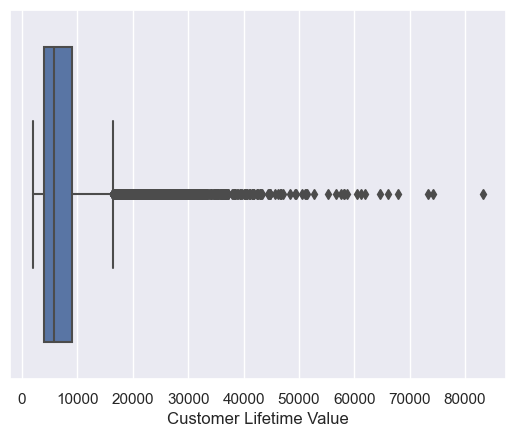

In [11]:
sns.boxplot(x = df['Customer Lifetime Value'])

<AxesSubplot:>

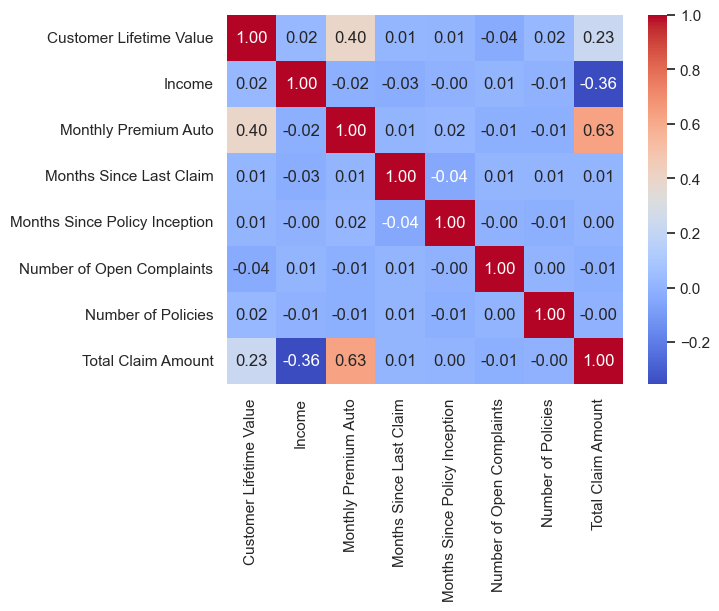

In [48]:
#Correleation Matrix

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt=".2f")

In [13]:
#CLV has is strong negative and positive correlation with Montly Premuim Auto and Total Claim Ammount

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


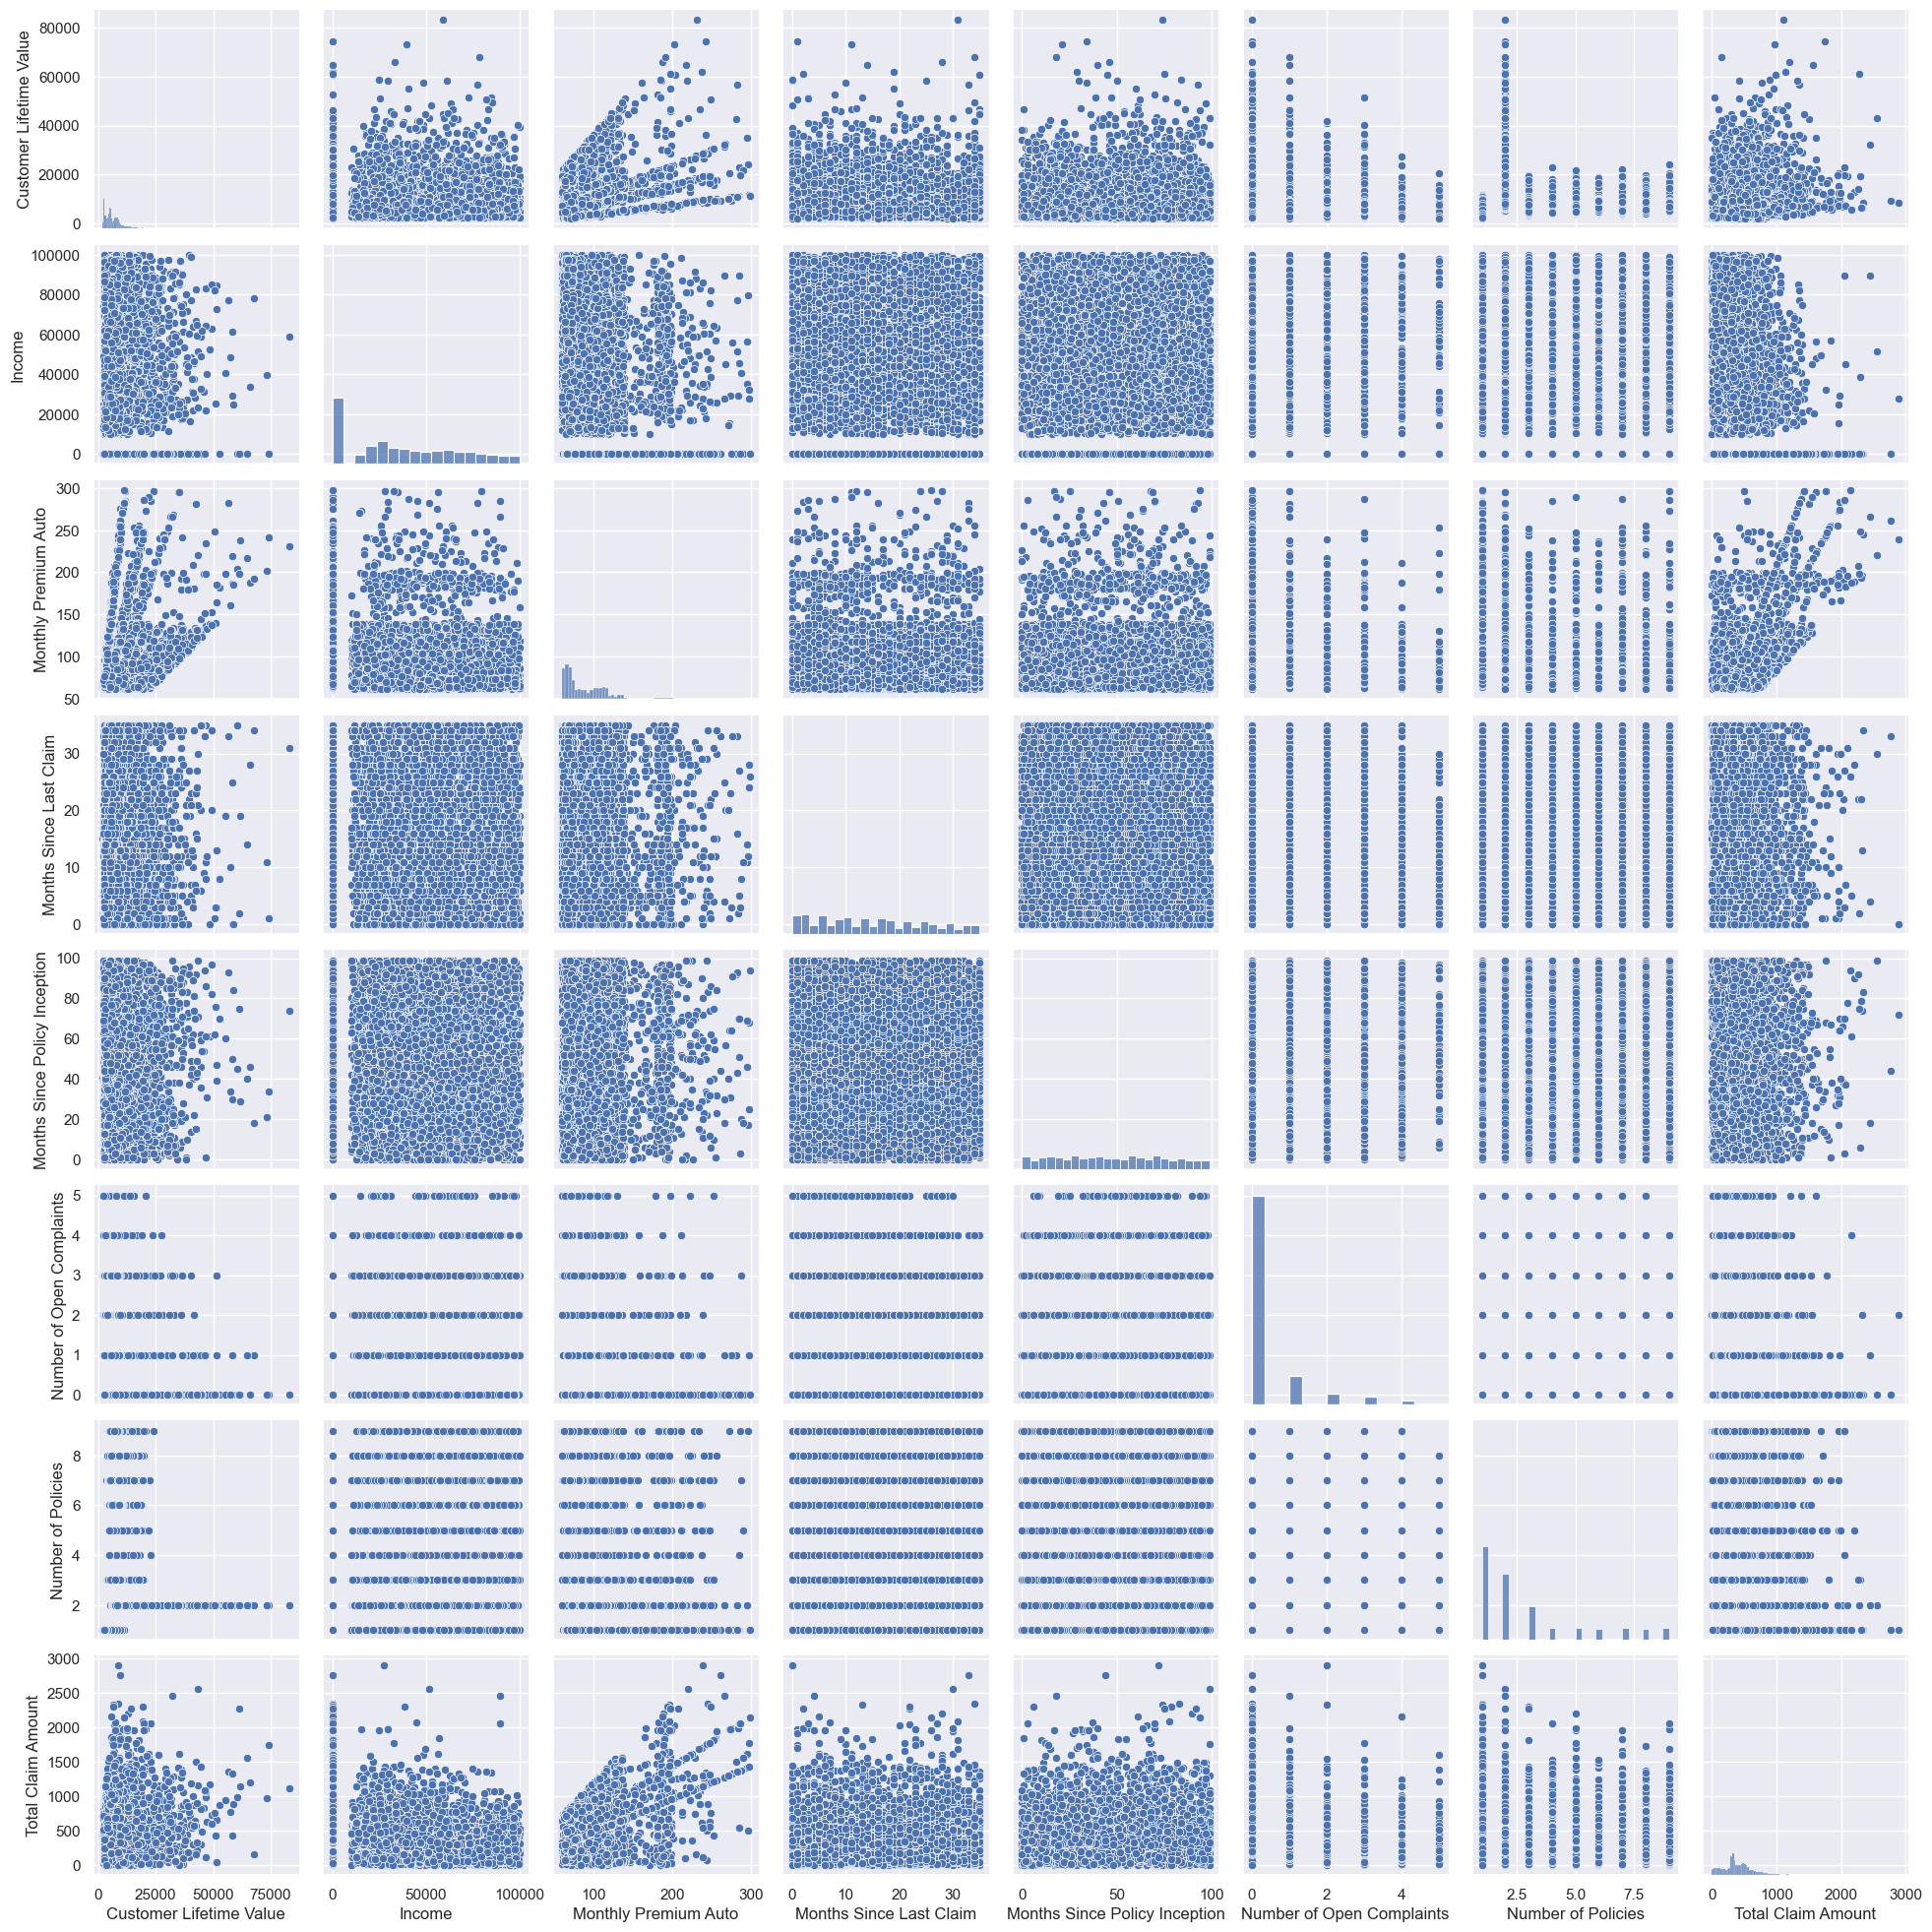

In [49]:
# Scatter Plot of all numeric variables
numeric_columns = df.select_dtypes(include=['number'])
sns.pairplot(numeric_columns)
numeric_columns

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64


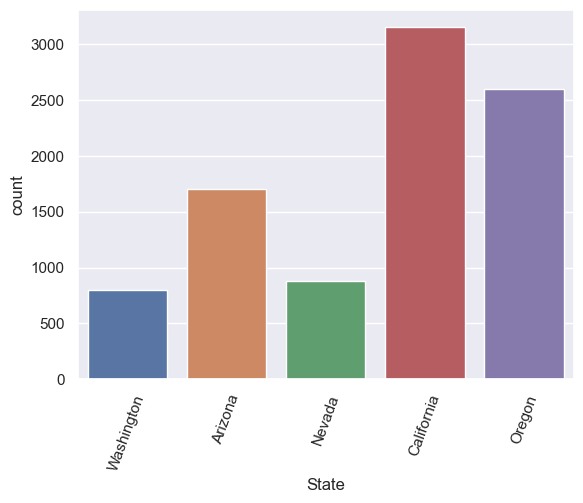


 

No     7826
Yes    1308
Name: Response, dtype: int64


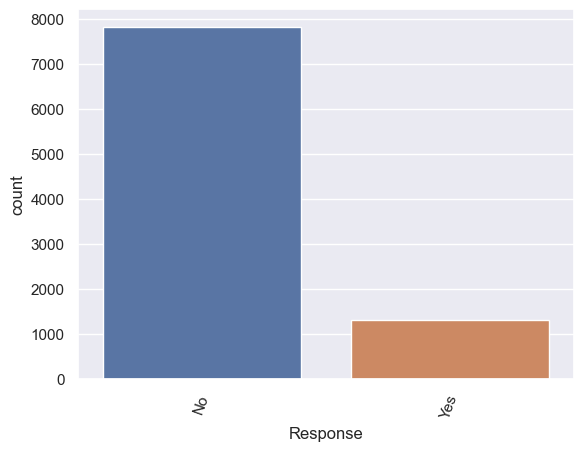


 

Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64


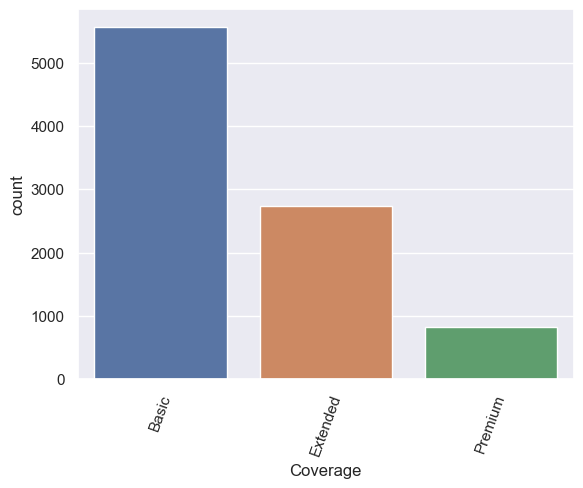


 

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64


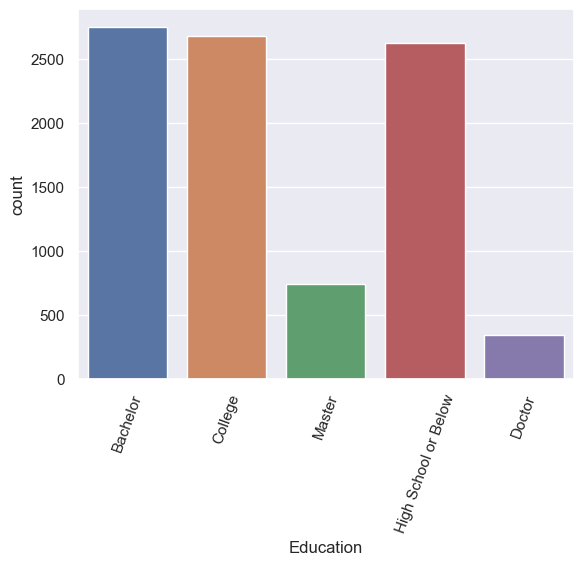


 

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64


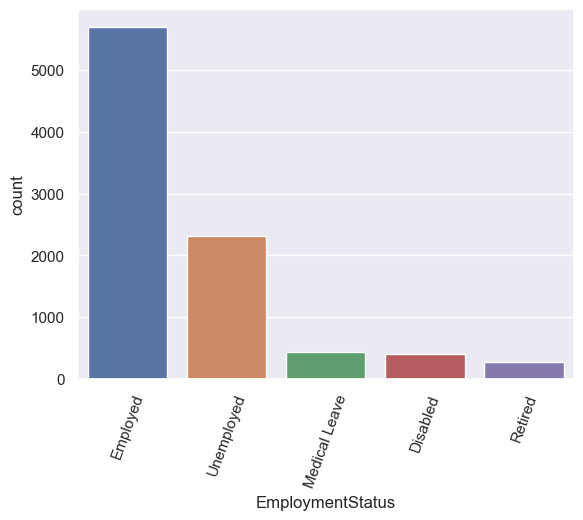


 

F    4658
M    4476
Name: Gender, dtype: int64


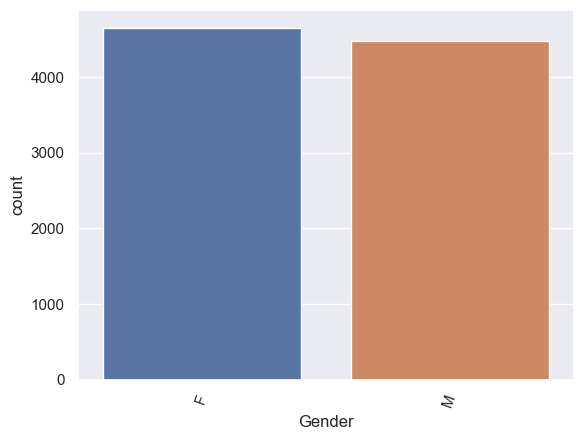


 

Suburban    5779
Rural       1773
Urban       1582
Name: Location Code, dtype: int64


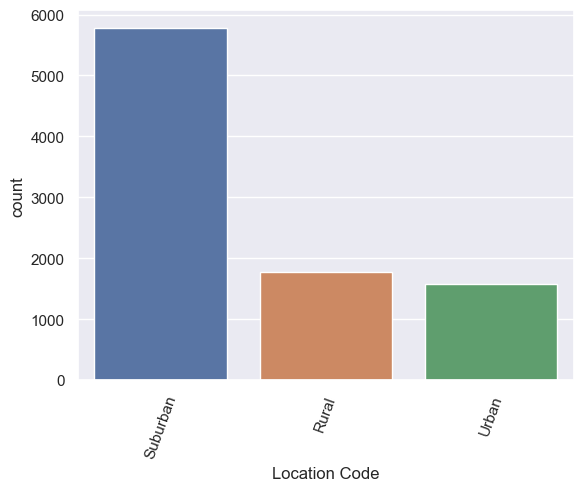


 

Married     5298
Single      2467
Divorced    1369
Name: Marital Status, dtype: int64


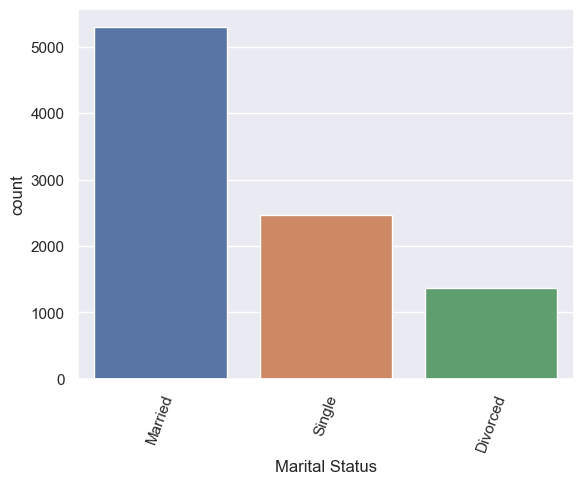


 

0    7252
1    1011
2     374
3     292
4     149
5      56
Name: Number of Open Complaints, dtype: int64


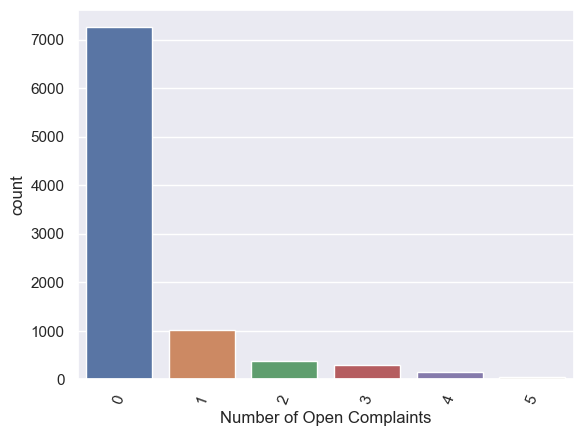


 

1    3251
2    2294
3    1168
7     433
9     416
4     409
5     407
8     384
6     372
Name: Number of Policies, dtype: int64


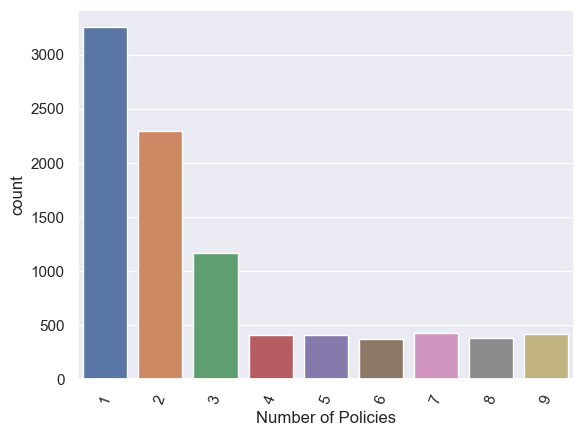


 

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy Type, dtype: int64


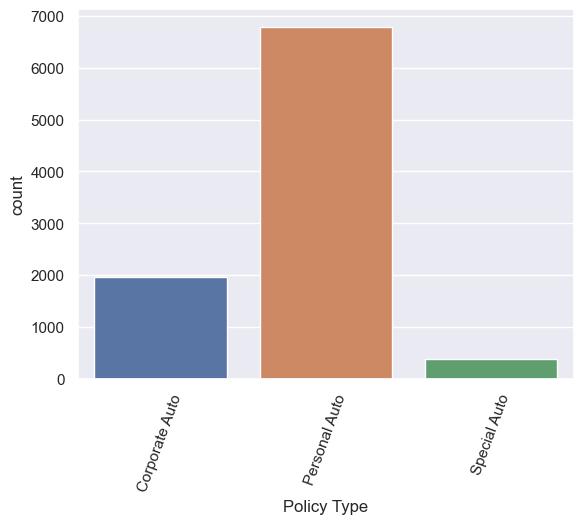


 

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: Policy, dtype: int64


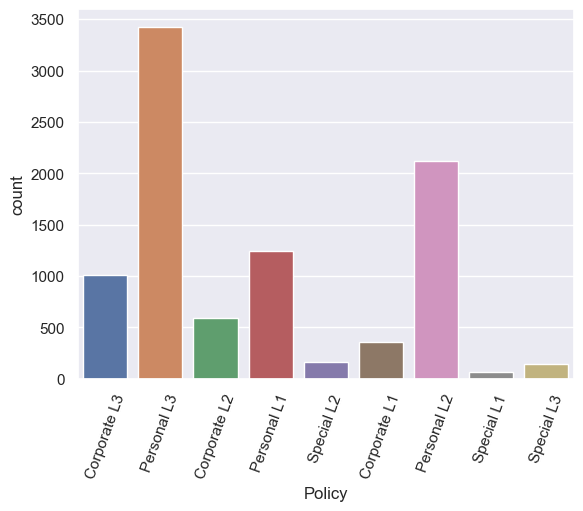


 

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: Renew Offer Type, dtype: int64


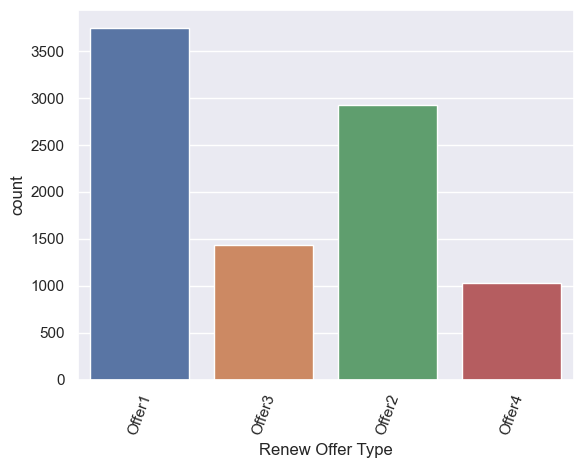


 

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: Sales Channel, dtype: int64


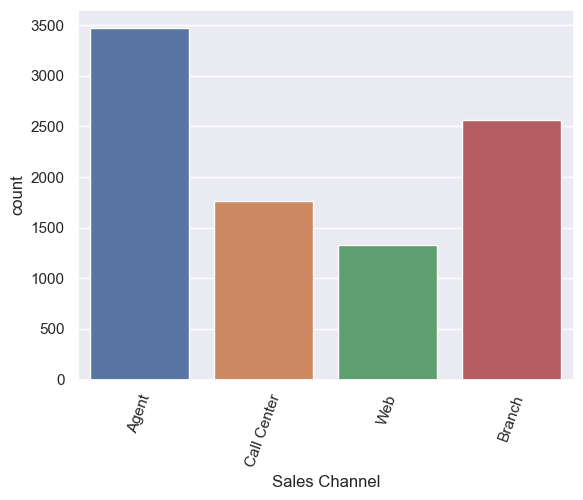


 

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: Vehicle Class, dtype: int64


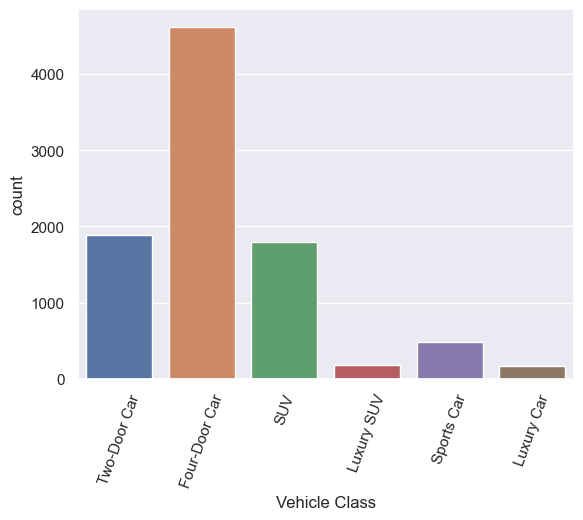


 

Medsize    6424
Small      1764
Large       946
Name: Vehicle Size, dtype: int64


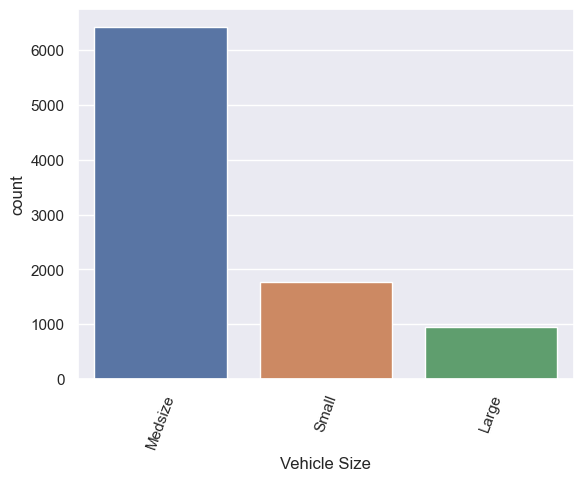

In [50]:
# Count Plots of all Catagorical and Numeric variables which have significant number of values

for i in df.columns:
    if len(df[i].value_counts()) <= 10:
        print(df[i].value_counts())
        sns.countplot(df[i])
        plt.xticks(rotation=70)
        plt.show()
        print('\n', '\n')

In [17]:
# Removing Outliers

def rem_outlier(df, i):
    for i in numeric_columns:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        IQR = q3 - q1
        l = q1 - 1.5 * IQR
        u = q3 + 1.5 * IQR

    df_out = df.loc[(df[i]>l)&(df[i]<u)]
    return df_out

for i in numeric_columns:
    df_no_outliers = rem_outlier(df,i)

In [18]:
df_no_outliers

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Prefixes
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,BU
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,AI
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,WW
4,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,Rural,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,HB
5,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,Rural,...,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize,OC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,10/2/2011,Employed,M,71941,Urban,...,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,LA
9130,California,3096.511217,Yes,Extended,College,12/2/2011,Employed,F,21604,Suburban,...,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,PK
9131,California,8163.890428,No,Extended,Bachelor,6/2/2011,Unemployed,M,0,Suburban,...,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,TD
9132,California,7524.442436,No,Extended,College,3/2/2011,Employed,M,21941,Suburban,...,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,UP


In [19]:
categorical_columns = df_no_outliers.select_dtypes(include=['object'])
#categorical_columns.drop(['Effective To Date', 'Prefixes'], axis = 1, inplace = True)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in categorical_columns:
    df_no_outliers[i] = le.fit_transform(df_no_outliers[i]).astype(int)
df

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Prefixes
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,BU
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,QZ
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,AI
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,WW
4,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,Rural,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,HB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,10/2/2011,Employed,M,71941,Urban,...,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,LA
9130,California,3096.511217,Yes,Extended,College,12/2/2011,Employed,F,21604,Suburban,...,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,PK
9131,California,8163.890428,No,Extended,Bachelor,6/2/2011,Unemployed,M,0,Suburban,...,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,TD
9132,California,7524.442436,No,Extended,College,3/2/2011,Employed,M,21941,Suburban,...,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,UP


#Correlation Heat Map

cor = df.corr()
plt.figure(figsize=(12, 10))

fig = plt.subplots(figsize = (20,20))
sns.set(font_scale = 0.5)

sns.heatmap(df.corr(),square=True,cmap='coolwarm',annot=True,annot_kws={"size":7})
plt.show()

In [20]:
dep = "Customer Lifetime Value"
X = df_no_outliers.drop(dep,axis = 1)
y = df_no_outliers[dep]
X_train_lm = sm.add_constant(X)

In [21]:
X.dtypes

State                              int32
Response                           int32
Coverage                           int32
Education                          int32
Effective To Date                  int32
EmploymentStatus                   int32
Gender                             int32
Income                             int64
Location Code                      int32
Marital Status                     int32
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                        int32
Policy                             int32
Renew Offer Type                   int32
Sales Channel                      int32
Total Claim Amount               float64
Vehicle Class                      int32
Vehicle Size                       int32
Prefixes                           int32
dtype: object

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 5)

# Multicolinearity

In [23]:
vif_cols=X[numeric_columns.columns[1:]]

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_cal():
    vif = pd.DataFrame()
    vif['VIF Factor'] = [variance_inflation_factor(vif_cols.values, i) for i in range(vif_cols.shape[1])]
    vif["Features"] = vif_cols.columns
    print(vif)

vif_cal()

   VIF Factor                       Features
0    2.900461                         Income
1   12.027209           Monthly Premium Auto
2    2.826223        Months Since Last Claim
3    3.377071  Months Since Policy Inception
4    1.166847      Number of Open Complaints
5    2.333666             Number of Policies
6    6.424508             Total Claim Amount


In [25]:
# removing High columns with high collinearity
vif_cols.drop(['Monthly Premium Auto'], axis = 1, inplace = True)

vif_cal()

   VIF Factor                       Features
0    2.174679                         Income
1    2.697830        Months Since Last Claim
2    3.141325  Months Since Policy Inception
3    1.164554      Number of Open Complaints
4    2.282536             Number of Policies
5    3.047510             Total Claim Amount


# OLS

In [26]:
#OLS
X_train_1 = X_train.drop(['Monthly Premium Auto'], axis = 1)

lm = sm.OLS(y_train, X_train).fit()

print(lm.summary())

                                   OLS Regression Results                                   
Dep. Variable:     Customer Lifetime Value   R-squared (uncentered):                   0.646
Model:                                 OLS   Adj. R-squared (uncentered):              0.645
Method:                      Least Squares   F-statistic:                              548.4
Date:                     Mon, 04 Dec 2023   Prob (F-statistic):                        0.00
Time:                             16:00:23   Log-Likelihood:                         -70205.
No. Observations:                     6944   AIC:                                  1.405e+05
Df Residuals:                         6921   BIC:                                  1.406e+05
Df Model:                               23                                                  
Covariance Type:                 nonrobust                                                  
                                    coef    std err          t      P>

In [27]:
#OLS Second Iteration
lm2 = sm.OLS(y_train, X_train.drop(['State', 'Response', 'Income' ,'Coverage','Education','EmploymentStatus','Gender','Location Code','Months Since Last Claim', 'Months Since Policy Inception', 'Policy', 'Sales Channel', 'Total Claim Amount', 'Vehicle Class'], axis = 1)).fit()
print(lm2.summary())

                                   OLS Regression Results                                   
Dep. Variable:     Customer Lifetime Value   R-squared (uncentered):                   0.644
Model:                                 OLS   Adj. R-squared (uncentered):              0.644
Method:                      Least Squares   F-statistic:                              1396.
Date:                     Mon, 04 Dec 2023   Prob (F-statistic):                        0.00
Time:                             16:00:23   Log-Likelihood:                         -70218.
No. Observations:                     6944   AIC:                                  1.405e+05
Df Residuals:                         6935   BIC:                                  1.405e+05
Df Model:                                9                                                  
Covariance Type:                 nonrobust                                                  
                                coef    std err          t      P>|t| 

In [28]:
X.skew()

State                            0.208127
Response                         2.031072
Coverage                         1.096790
Education                        0.342435
Effective To Date                0.037940
EmploymentStatus                 0.910015
Gender                           0.058785
Income                           0.251284
Location Code                    0.014641
Marital Status                  -0.082249
Monthly Premium Auto             1.638822
Months Since Last Claim          0.286407
Months Since Policy Inception    0.040578
Number of Open Complaints        2.776139
Number of Policies               1.264654
Policy Type                     -0.465029
Policy                          -0.425602
Renew Offer Type                 0.703805
Sales Channel                    0.502023
Total Claim Amount               0.320420
Vehicle Class                    0.407834
Vehicle Size                     0.075485
Prefixes                         0.004597
dtype: float64

In [29]:
from sklearn.preprocessing import power_transform
X = power_transform(X, method = 'yeo-johnson')
X

array([[ 1.54626125, -0.40975591, -0.76863266, ...,  1.24614838,
        -0.16030511, -1.64162931],
       [ 0.32169403, -0.40975591,  1.56339047, ...,  1.24614838,
        -0.16030511, -2.03440628],
       [-0.46678519, -0.40975591, -0.76863266, ...,  0.86009881,
        -0.16030511,  1.22608071],
       ...,
       [-0.46678519, -0.40975591,  1.2187415 , ..., -0.93579371,
        -0.16030511,  0.81905293],
       [-0.46678519, -0.40975591,  1.2187415 , ..., -0.93579371,
        -2.05049174,  0.98104293],
       [-0.46678519, -0.40975591,  1.2187415 , ...,  1.24614838,
        -0.16030511,  1.34793672]])

In [30]:
print(X.shape)
print(df_no_outliers.shape)

(8681, 23)
(8681, 24)


In [31]:
df1 = pd.DataFrame(X, columns = df_no_outliers.drop('Customer Lifetime Value', axis = 1).columns)
df1

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Prefixes
0,1.546261,-0.409756,-0.768633,-1.279711,0.703822,-0.464894,-0.971045,0.668352,0.051471,-0.167927,...,-0.509169,-1.147305,-1.642433,-1.140984,-1.121143,-1.163702,0.065401,1.246148,-0.160305,-1.641629
1,0.321694,-0.409756,1.563390,-1.279711,0.393340,-0.464894,-0.971045,0.566045,0.051471,-0.167927,...,-0.509169,-0.056533,0.319942,0.745536,-1.121143,-1.163702,0.845607,1.246148,-0.160305,-2.034406
2,-0.466785,-0.409756,-0.768633,-1.279711,-1.157076,1.482467,1.029819,-1.697907,0.051471,-0.167927,...,-0.509169,1.468494,-1.642433,-1.668062,-1.121143,0.931970,0.695107,0.860099,-0.160305,1.226081
3,1.546261,-0.409756,-0.768633,-1.279711,1.000803,-0.464894,1.029819,0.492646,-1.597533,1.429473,...,-0.509169,-1.147305,0.319942,-0.556578,-1.121143,-1.163702,-1.209947,-0.935794,-0.160305,-0.714103
4,0.976200,2.440477,-0.768633,-1.279711,-0.794057,-0.464894,-0.971045,0.750968,-1.597533,-0.167927,...,-0.509169,-0.056533,0.319942,0.745536,0.331444,1.461995,-1.082557,1.246148,-0.160305,0.229964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8676,-0.466785,-0.409756,-0.768633,-1.279711,-0.282188,-0.464894,1.029819,0.854288,1.619108,-0.167927,...,-0.509169,-0.056533,0.319942,-0.556578,0.331444,1.461995,-0.861596,-0.935794,-0.160305,-0.160165
8677,-0.466785,2.440477,1.218741,-0.176322,-0.047242,-0.464894,-0.971045,0.060046,0.051471,-1.746400,...,-0.509169,-1.147305,-1.642433,-1.140984,-1.121143,0.171884,0.039784,-0.935794,-0.160305,0.388045
8678,-0.466785,-0.409756,1.218741,-1.279711,1.286497,1.482467,1.029819,-1.697907,0.051471,1.429473,...,2.022409,-0.056533,-1.642433,-1.668062,-1.121143,0.171884,1.714408,-0.935794,-0.160305,0.819053
8679,-0.466785,-0.409756,1.218741,-0.176322,1.000803,-0.464894,1.029819,0.068571,0.051471,-0.167927,...,-0.509169,0.523945,0.319942,0.074529,1.070695,0.171884,1.338921,-0.935794,-2.050492,0.981043


In [32]:
df1.shape

(8681, 23)

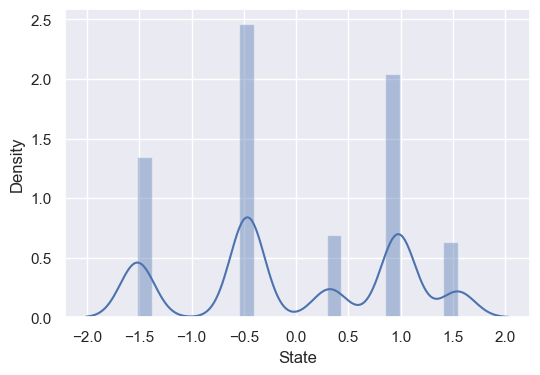

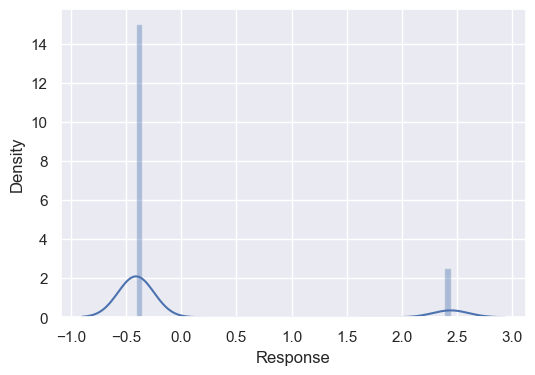

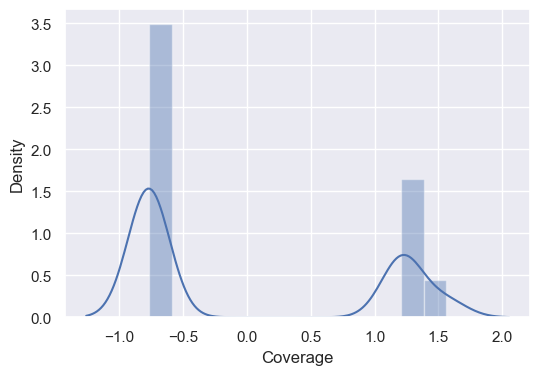

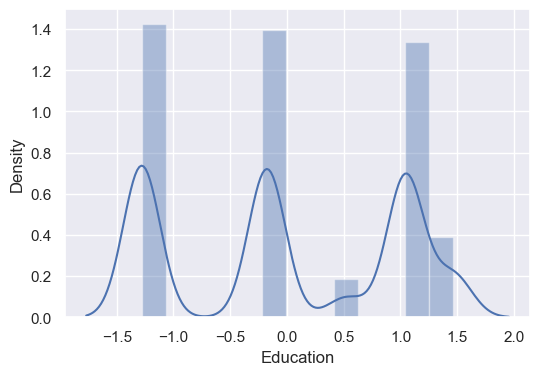

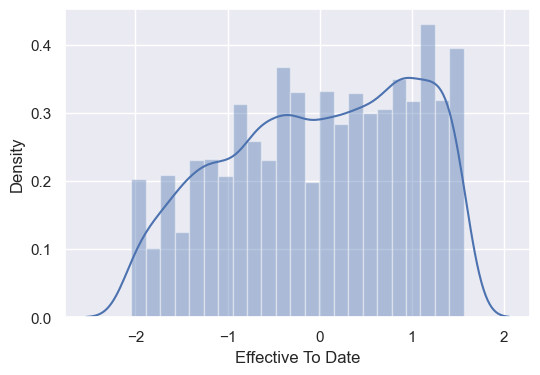

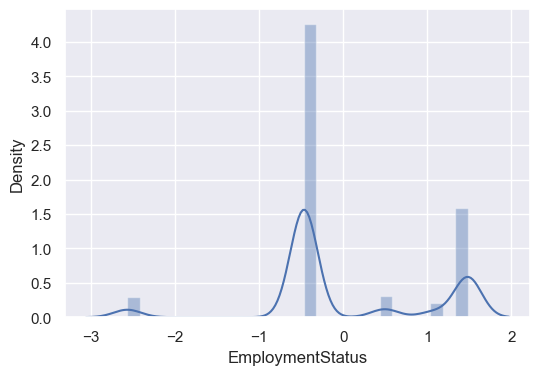

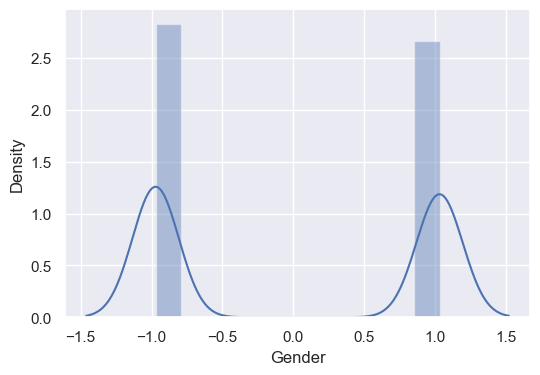

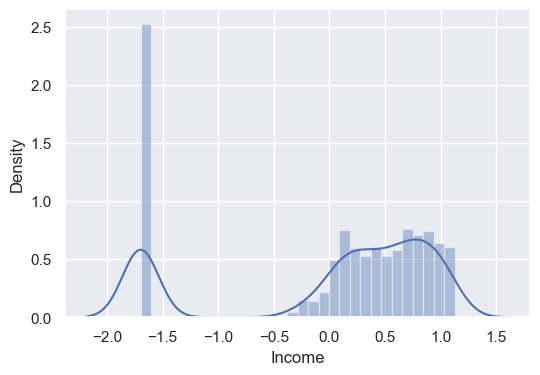

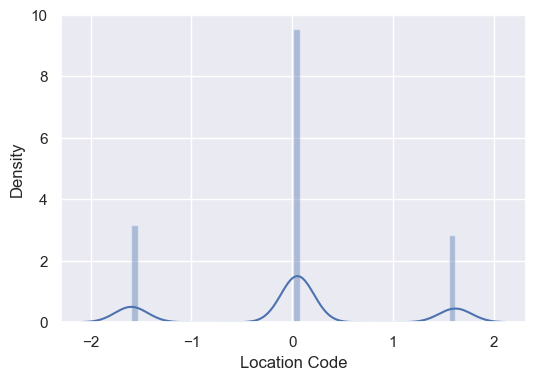

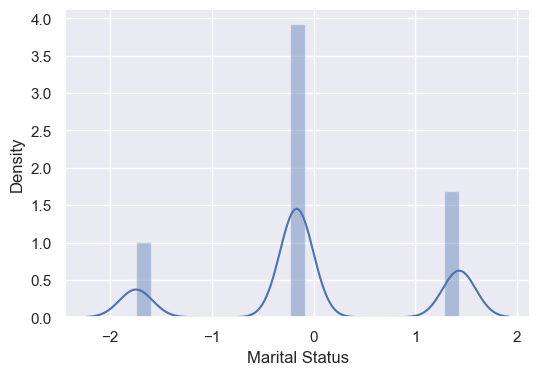

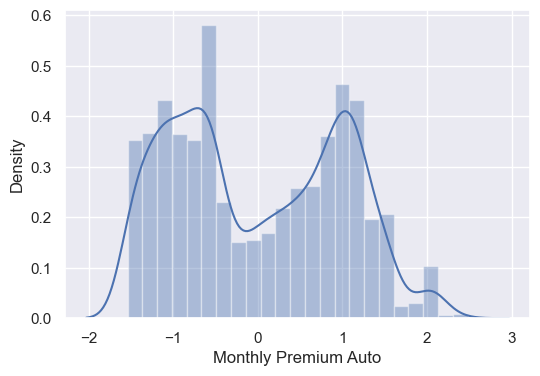

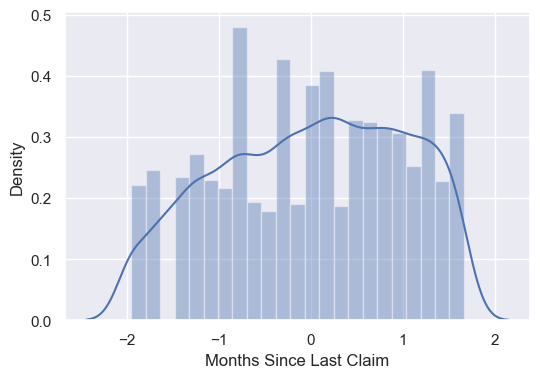

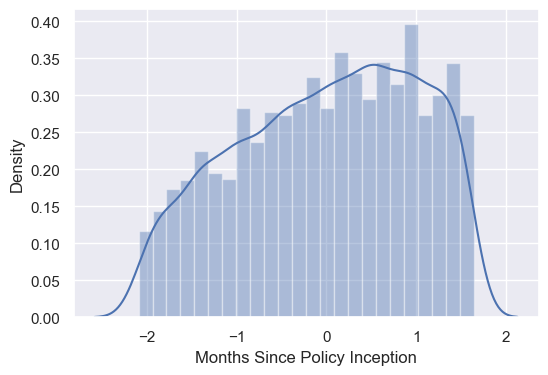

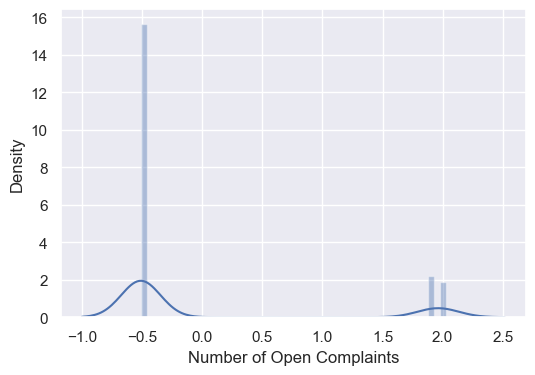

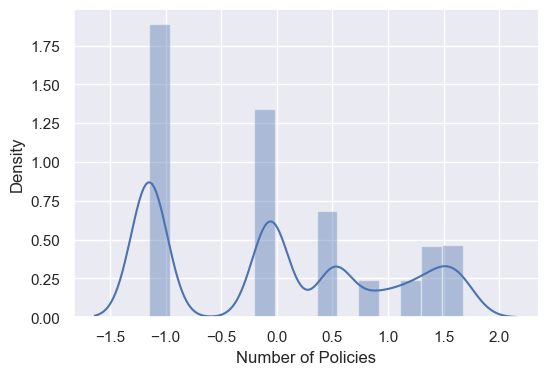

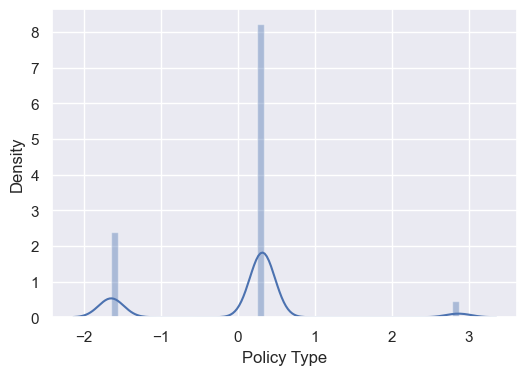

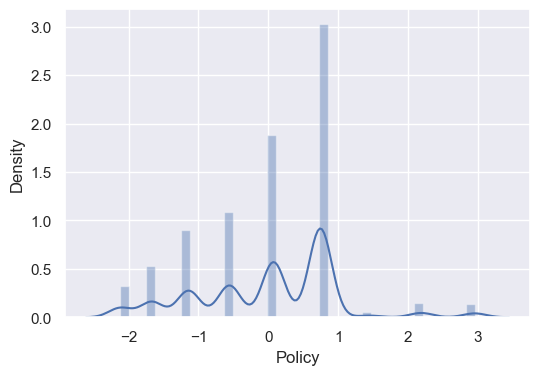

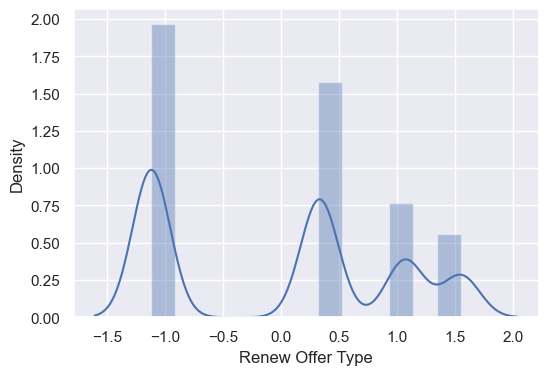

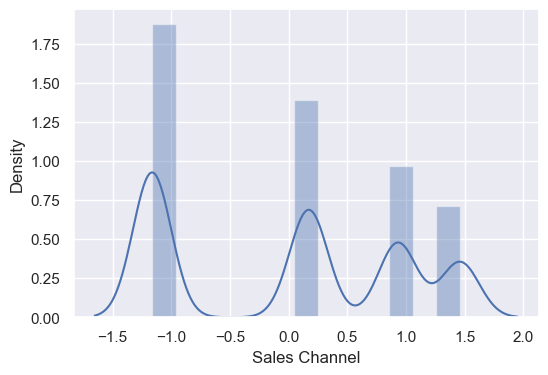

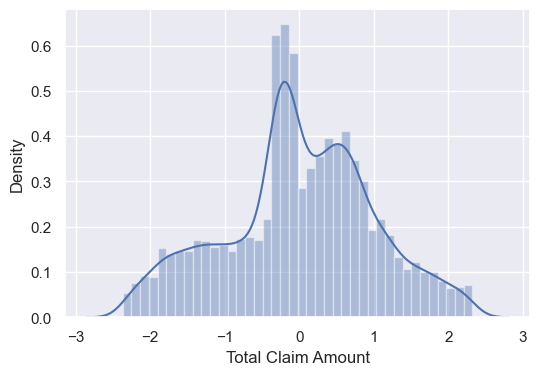

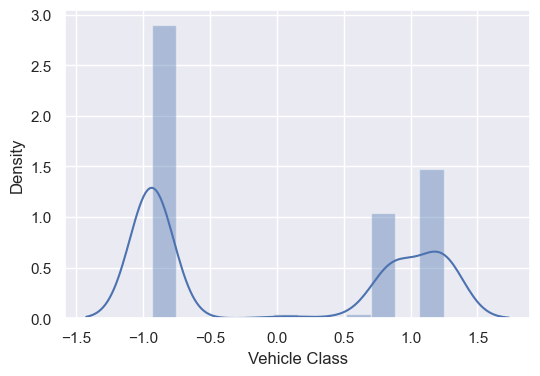

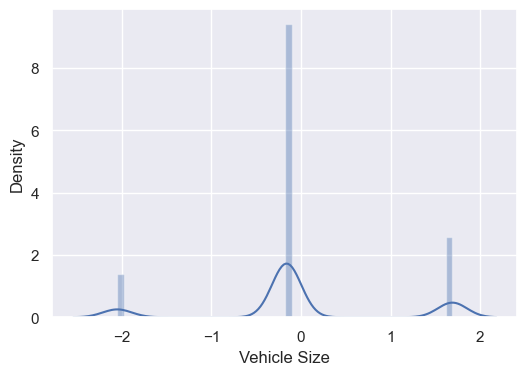

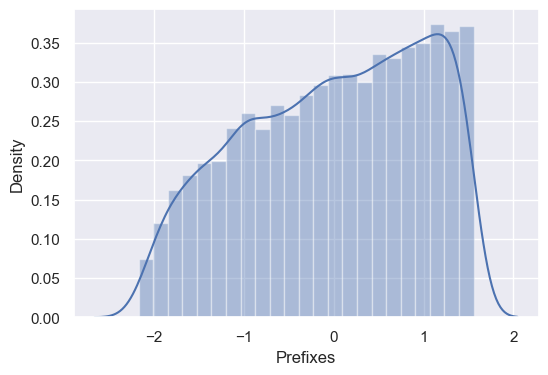

In [33]:
for i in df1.columns:
    plt.figure(figsize = (6,4))
    sns.distplot(df1[i])
    plt.show()

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 1.54626125, -0.40975591, -0.76863266, ...,  1.24614838,
        -0.16030511, -1.64162931],
       [ 0.32169403, -0.40975591,  1.56339047, ...,  1.24614838,
        -0.16030511, -2.03440628],
       [-0.46678519, -0.40975591, -0.76863266, ...,  0.86009881,
        -0.16030511,  1.22608071],
       ...,
       [-0.46678519, -0.40975591,  1.2187415 , ..., -0.93579371,
        -0.16030511,  0.81905293],
       [-0.46678519, -0.40975591,  1.2187415 , ..., -0.93579371,
        -2.05049174,  0.98104293],
       [-0.46678519, -0.40975591,  1.2187415 , ...,  1.24614838,
        -0.16030511,  1.34793672]])

In [35]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 20, random_state = 10)

print(train_X.shape[:1], train_y.shape, test_X.shape[:1], test_y.shape)

(8661,) (8661,) (20,) (20,)


In [36]:
lm = LinearRegression()
lm.fit(train_X, train_y)
print('model score =', lm.score(train_X, train_y))
print(lm.coef_)

model score = 0.1623876277170081
[  32.72519555  -55.37719443 -397.92063487   63.66311178 -162.69442789
   47.77121297 -135.61426889  292.07809456    5.358842   -156.60486872
 2335.72066459   55.23363558  -36.09086344  -93.4468844  1242.52519908
  119.14992529    7.54495534 -172.71693875  -40.24846632   -2.64590167
   58.93092823   93.81905095 -167.86196465]


In [37]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
predlm=lm.predict(test_X)
print('Mean Absolute Error: ',mean_absolute_error(test_y,predlm))
print('Mean Squared Error: ',mean_squared_error(test_y,predlm))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(test_y,predlm)))

Mean Absolute Error:  2927.6879078322477
Mean Squared Error:  12848780.638363415
Root Mean Squared Error:  3584.519582644711


In [38]:
#Model Prediction
pred = lm.predict(test_X)
err = np.abs(test_y-pred)
err

3879    4404.236002
7627    2876.717732
1878    1749.589072
8197    4885.600863
1304    2365.946594
2779    9449.585163
2572     537.314147
3678    3757.411268
3759    1663.773537
2408    3154.710751
6085    3246.476449
2227     148.651297
2725     582.288635
6525    2553.626644
8494    2052.109748
3639     508.564437
8435    2644.235665
4508    5302.646077
8024    4078.514630
8641    2591.759445
Name: Customer Lifetime Value, dtype: float64

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
#from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [40]:
LR= LinearRegression()
RD= Ridge()
LS= Lasso()
DT= DecisionTreeRegressor()
SV= SVR()
KNR= KNeighborsRegressor()
RFR= RandomForestRegressor()
#XGB= XGBRegressor()
ADA=AdaBoostRegressor()
GB= GradientBoostingRegressor()

In [41]:
models = [LR, RD, LS, DT, SV, KNR, RFR, ADA, GB]

In [42]:
for i in models:
    i.fit(train_X, train_y)
    print('Accuracy Score of', i, ':', i.score(train_X, train_y), '\n')

Accuracy Score of LinearRegression() : 0.1623876277170081 

Accuracy Score of Ridge() : 0.16238762276866403 

Accuracy Score of Lasso() : 0.16238675351188125 

Accuracy Score of DecisionTreeRegressor() : 1.0 

Accuracy Score of SVR() : -0.09541611711439368 

Accuracy Score of KNeighborsRegressor() : 0.4713864746898445 

Accuracy Score of RandomForestRegressor() : 0.9568738728473393 

Accuracy Score of AdaBoostRegressor() : 0.26232507725485266 

Accuracy Score of GradientBoostingRegressor() : 0.7158633303395288 



In [43]:
def mape(Y_test, pred):
    Y_test, pred = np.array(Y_test), np.array(pred)
    return np.mean(np.abs((Y_test-pred)/Y_test))*100

In [44]:
mape(test_y, pred)

53.63689534867506

In [45]:
from sklearn.model_selection import cross_val_score
for g in models:
    score = cross_val_score(g, X, y, cv = 5)
    print("Cross validation score of ", g, ': ', score, '\n')

Cross validation score of  LinearRegression() :  [0.15338453 0.15383234 0.16713892 0.1657693  0.14043758] 

Cross validation score of  Ridge() :  [0.15338589 0.15383455 0.16714409 0.16576286 0.14044328] 

Cross validation score of  Lasso() :  [0.1534562  0.15389986 0.16718886 0.1657502  0.14047098] 

Cross validation score of  DecisionTreeRegressor() :  [0.40659116 0.48927364 0.29904971 0.52511389 0.40346391] 

Cross validation score of  SVR() :  [-0.09823737 -0.09327854 -0.11382914 -0.09150516 -0.09190196] 

Cross validation score of  KNeighborsRegressor() :  [0.15167494 0.1764542  0.16181458 0.24501579 0.16642139] 

Cross validation score of  RandomForestRegressor() :  [0.68387609 0.70757053 0.67651772 0.70542246 0.70376207] 

Cross validation score of  AdaBoostRegressor() :  [0.23503282 0.13079435 0.0179455  0.6202712  0.31641719] 

Cross validation score of  GradientBoostingRegressor() :  [0.66452221 0.69650442 0.6580466  0.67804021 0.66985271] 



# Random Forest Regression

In [46]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
}

gcv1 = GridSearchCV(RandomForestRegressor(), param_grid, cv = 5, scoring = 'neg_mean_squared_error')
gcv1.fit(train_X, train_y)
gcv1.best_params_

{'max_depth': None, 'n_estimators': 200}

In [53]:
gcv1.best_estimator_.fit(test_X,test_y)
print("Train Accuracy=",gcv1.best_estimator_.score(train_X,train_y))

Train Accuracy= 0.23285537437902648


In [54]:
best_estimator = gcv1.best_estimator_
best_estimator

RandomForestRegressor(n_estimators=200)

In [56]:
print('ERROR:')
from sklearn.metrics import mean_absolute_error,mean_squared_error
predlm=best_estimator.predict(test_X)
print('Mean Absolute Error: ',mean_absolute_error(test_y,predlm))
print('Mean Squared Error: ',mean_squared_error(test_y,predlm))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(test_y,predlm)))

ERROR:
Mean Absolute Error:  946.5606316374957
Mean Squared Error:  1362402.0990827973
Root Mean Squared Error:  1167.2198160941225


,Predicted,Original
3879,5142.098606,4408.071476
7627,4957.134061,3148.424090
1878,5701.650954,5366.779081
8197,4716.833168,4627.090729
1304,9952.084604,12036.620510
2779,12738.889702,15122.991940
2572,3270.252159,2224.089639
3678,6601.989145,5977.785370
3759,6651.997355,6288.156817
2408,11360.351555,13610.107460


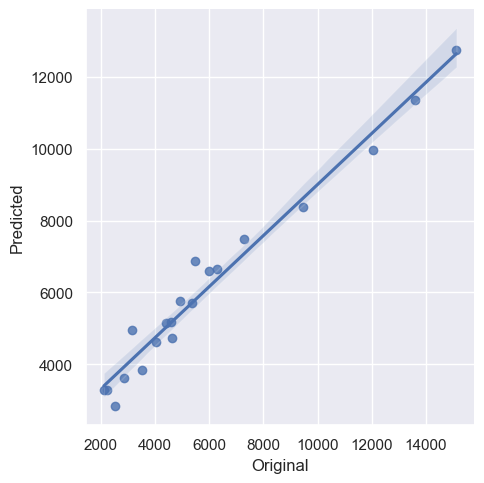

In [57]:
MLdf= pd.DataFrame({'Original':test_y, 'Predicted':predlm},columns=["Predicted","Original"])
sns.lmplot(x='Original',y='Predicted',data=MLdf,palette='rainbow')
MLdf